<a href="https://colab.research.google.com/github/chhammet/ST554_HW4/blob/main/cole_hammett_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ST554 Week 4 Homework Assignment

Cole Hammett

10th of February 2026

## Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## Homework 3 code to read in student data:

In [4]:

student_data = pd.read_csv('https://www4.stat.ncsu.edu/online/datasets/StudentData.txt', sep=';')

### Summaries of Categorical Variables

In [5]:
# One-way contingency table
pd.crosstab(index=student_data['school'], columns='count')

col_0,count
school,
GP,349
MS,46


In [6]:
# Two-way contingency table
pd.crosstab(index=student_data['school'], columns=student_data['sex'])

sex,F,M
school,,
GP,183,166
MS,25,21


In [7]:
# Three-way contingency table
pd.crosstab(index=[student_data['school'], student_data['sex']],
            columns=student_data['address'])

address      R    U
school sex         
GP     F    31  152
       M    32  134
MS     F    13   12
       M    12    9

In [8]:
# Conditional two-way table - subsetting first
urban_students = student_data.loc[student_data['address'] == 'U']
pd.crosstab(index=urban_students['school'], columns=urban_students['sex'])

sex,F,M
school,,
GP,152,134
MS,12,9


In [9]:
# Conditional two-way table - subset three-way table
three_way = pd.crosstab(index=[student_data['school'], student_data['address']],
                        columns=student_data['sex'])
three_way.loc[(slice(None), 'U'), :]

,sex,F,M
school,address,,
GP,U,152,134
MS,U,12,9


### Summaries of Numerical Variables

In [10]:
# Measures of center and spread for age, absences, G3
student_data[['age', 'absences', 'G3']].describe()

,age,absences,G3
count,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.415190
std,1.276043,8.003096,4.581443
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000
50%,17.000000,4.000000,11.000000
75%,18.000000,8.000000,14.000000
max,22.000000,75.000000,20.000000


In [11]:
# By grouping variable (e.g., by school)
student_data.groupby('school')[['age', 'absences', 'G3']].describe()

age                                                     absences  \
        count       mean       std   min    25%   50%   75%   max    count   
school                                                                       
GP      349.0  16.521490  1.216610  15.0  16.00  16.0  17.0  22.0    349.0   
MS       46.0  18.021739  0.881643  17.0  17.25  18.0  18.0  21.0     46.0   

                  ...                 G3                                       \
            mean  ...   75%   max  count       mean       std  min  25%   50%   
school            ...                                                           
GP      5.965616  ...  8.00  75.0  349.0  10.489971  4.625397  0.0  8.0  11.0   
MS      3.760870  ...  4.75  17.0   46.0   9.847826  4.237229  0.0  8.0  10.0   

                     
          75%   max  
school               
GP      14.00  20.0  
MS      12.75  19.0  

[2 rows x 24 columns]

In [12]:
# Across single grouping variable
student_data.groupby('school')[['age', 'absences', 'G3']].agg(['mean', 'std', 'median'])

age                   absences                          G3  \
             mean       std median      mean       std median       mean   
school                                                                     
GP      16.521490  1.216610   16.0  5.965616  8.341764    4.0  10.489971   
MS      18.021739  0.881643   18.0  3.760870  4.274913    3.0   9.847826   

                         
             std median  
school                   
GP      4.625397   11.0  
MS      4.237229   10.0

In [13]:
# Across two grouping variables
student_data.groupby(['school', 'sex'])[['age', 'absences', 'G3']].agg(['mean', 'std'])

age            absences                   G3          
                 mean       std      mean       std       mean       std
school sex                                                              
GP     F    16.579235  1.173426  6.639344  9.852259   9.972678  4.604622
       M    16.457831  1.263005  5.222892  6.215695  11.060241  4.594725
MS     F    17.840000  0.746101  3.120000  4.702127   9.920000  4.846992
       M    18.238095  0.995227  4.523810  3.669047   9.761905  3.491486

In [14]:
# Correlation matrix
student_data[['age', 'absences', 'G1', 'G2', 'G3']].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


## Start of homework 4

### Visualizations of Categorical Variable

In [17]:
stack_table = pd.crosstab(index=student_data['school'], columns=student_data['sex'])
print(type(stack_table))
stack_table

<class 'pandas.core.frame.DataFrame'>


sex,F,M
school,,
GP,183,166
MS,25,21


In [25]:
student_data["sex"] = student_data.sex.astype("category")
student_data.sex = student_data.sex.cat.rename_categories(
                                    ["F", "M"])

student_data["school"] = student_data.school.astype("category")
student_data.school = student_data.school.cat.rename_categories(
                                    ["GP", "MS"])

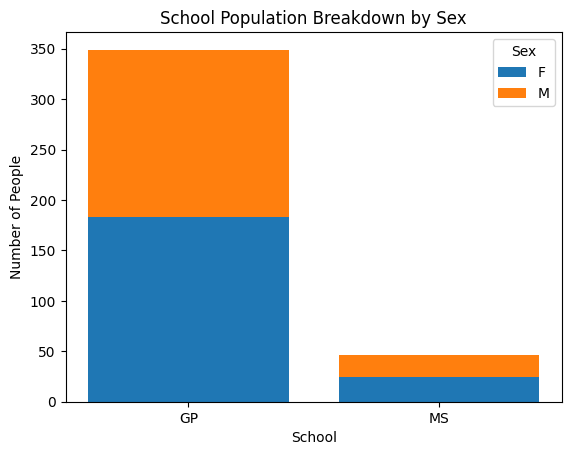

In [42]:
plt.bar(
  x = student_data.school.cat.categories,
  height = stack_table.loc[:, "F"],
  label = "F")
plt.bar(
  x = student_data.school.cat.categories,
  height = stack_table.loc[:, "M"],
  bottom = stack_table.loc[:, "F"],
  label = "M"
)
plt.xlabel("School")
plt.ylabel("Number of People")
plt.title("School Population Breakdown by Sex")
plt.legend(loc = 0, title = "Sex")


The school population looks to have fairly equivalent numbers of both populations. The school's have very different populations overall, with GP having many more students than MS.

Text(0.5, 1.0, 'School Population Breakdown by Sex')

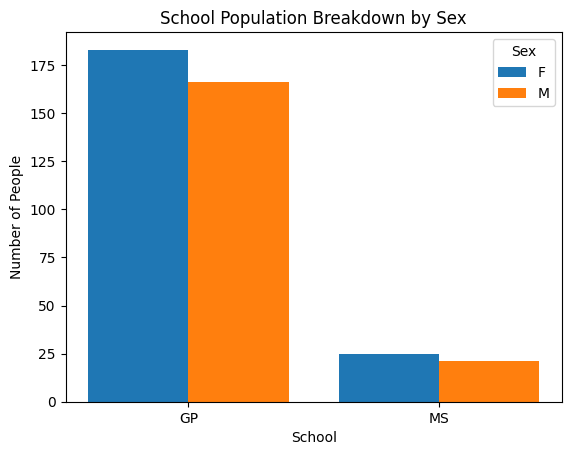

In [41]:
plt.bar(
  x = [1, 2],
  height = stack_table.loc[:, "F"],
  width = 0.4,
  label = "F")
plt.bar(
  x = [1.4, 2.4],
  height = stack_table.loc[:, "M"],
  width = 0.4,
  label = "M")
plt.xticks([1.2, 2.2], student_data.school.cat.categories)
plt.xlabel("School")
plt.ylabel("Number of People")
plt.legend(loc = 0, title = "Sex")
plt.title("School Population Breakdown by Sex")

When viewed as a side-by-side bar graph, the school populations look to have a less equivalent numbers of both populations relative to visualizing with the stacked bar. The school's have very different populations overall, with GP having many more students than MS.

### Visualizations of Numeric Variables

In [54]:
ms_g1 = student_data.loc[student_data.school == "MS", "G1"]
gp_g1 = student_data.loc[student_data.school == "GP", "G1"]

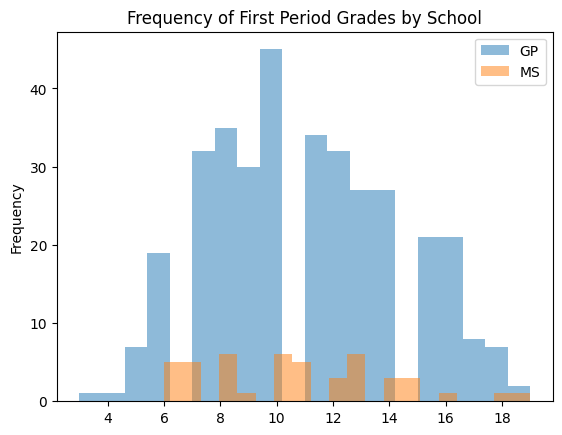

In [73]:
bins = 20
gp_g1.plot.hist(bins = bins, alpha = 0.5, label = "GP",
                   title = "Frequency of First Period Grades by School") \
                   .set(xlabel = "Grade",
                        ylabel = "Frequency")
ms_g1.plot.hist(bins = bins, alpha = 0.5, label = "MS")
plt.legend()

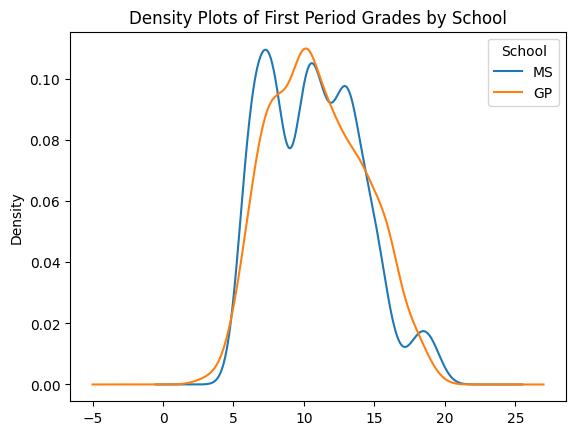

In [82]:
student_data.loc[student_data.school == "MS", "G1"].plot.density(bw_method = 0.25, label = "MS",
                                  title = "Density Plots of First Period Grades by School")
student_data.loc[student_data.school == "GP", "G1"].plot.density(bw_method = 0.25, label = "GP")
plt.legend(title = "School")


<Axes: title={'center': 'G1'}, xlabel='school'>

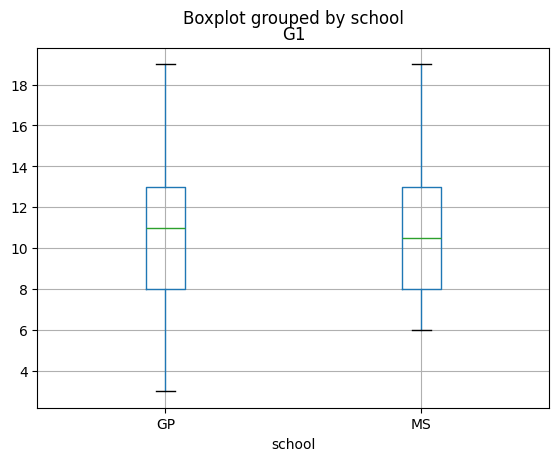

In [86]:

student_data.boxplot(column = ["G1"], by = "school")

<Axes: title={'center': 'Scatter plots rule!'}, xlabel='G3', ylabel='G1'>

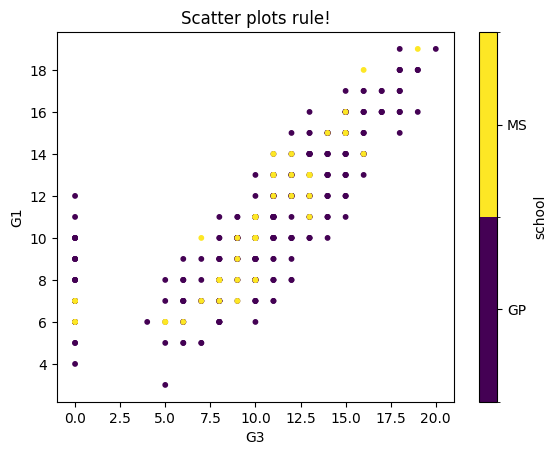

In [91]:
student_data.plot.scatter(x = "G3", y = "G1", title = "G3 vs. G1 by Sschool", c = "school", cmap = "viridis", s = 10)

<Axes: title={'center': 'Scatter plots rule!'}, xlabel='G3', ylabel='absences'>

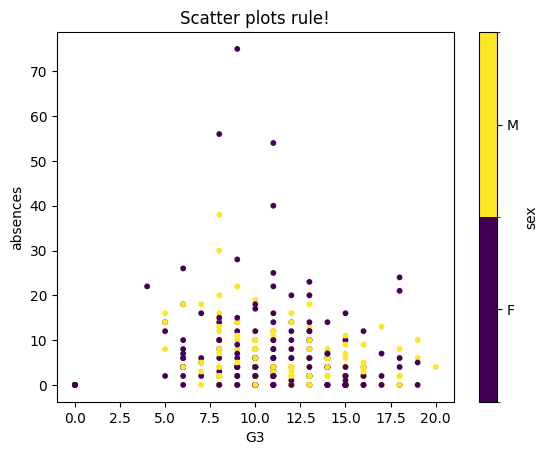

In [93]:
student_data.plot.scatter(x = "G3", y = "absences", title = "G3 vs. Absences by Sex", c = "sex", cmap = "viridis", s = 10)

## Part 2: Plotting the NFL Data

In [96]:
# Read from URL
nfl_df = pd.read_csv("/content/scoresFull.csv")

In [106]:
nfl_df.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1.0,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1.0,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1.0,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1.0,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1.0,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [107]:
# Convert to categories
cat_vars = ['homeTeam', 'awayTeam', 'day', 'stadium',
            'startTime', 'toss', 'roof', 'surface']

for col in cat_vars:
    nfl_df[col] = nfl_df[col].astype('category')

In [108]:
nfl_df['week'] = pd.to_numeric(nfl_df['week'])
nfl_df = nfl_df[nfl_df['week'].between(1, 17)]

### Summaries

In [121]:
summary_season_week = nfl_df.groupby(['season', 'week']).agg({
    'AFinal': ['mean', 'median', 'max', 'min'],
    'HFinal': ['mean', 'median', 'max', 'min'],
    'AtotalYds': ['mean', 'median'],
    'HtotalYds': ['mean', 'median'],
    'Aturnovers': ['mean', 'sum'],
    'Hturnovers': ['mean', 'sum']
})
print(summary_season_week.head(10))

                AFinal                    HFinal                  AtotalYds  \
                  mean median max min       mean median max min        mean   
season week                                                                   
2002   1.0   23.125000   23.0  40   7  26.125000   27.0  49   6  310.000000   
       2.0   22.687500   23.5  45   3  18.187500   16.5  39   0  340.937500   
       3.0   19.571429   22.0  38   3  24.428571   27.0  44   3  299.214286   
       4.0   18.928571   19.0  35   3  28.285714   27.0  52   7  344.071429   
       5.0   24.000000   23.0  49   9  23.214286   25.5  37   6  379.571429   
       6.0   23.285714   24.0  43   3  20.785714   22.0  35   7  309.285714   
       7.0   15.928571   13.5  37   0  24.857143   25.5  37   9  326.071429   
       8.0   20.142857   21.0  37   3  21.857143   20.5  38   9  316.714286   
       9.0   23.142857   23.0  44   7  15.928571   14.5  38   3  343.857143   
       10.0  23.500000   27.0  35   7  22.571429   2

In [120]:
summary_season = nfl_df.groupby('season').agg({
    'AFinal': ['mean', 'median', 'max', 'min', 'std'],
    'HFinal': ['mean', 'median', 'max', 'min', 'std'],
    'AtotalYds': ['mean', 'median', 'max', 'min'],
    'HtotalYds': ['mean', 'median', 'max', 'min'],
    'awayPassYds': ['mean', 'median'],
    'awayRushYds': ['mean', 'median'],
    'Aturnovers': ['mean', 'sum'],
    'Hturnovers': ['mean', 'sum'],
    'awayPenYds': ['mean', 'sum'],
    'homePenYds': ['mean', 'sum']
})
print(summary_season.head(10))

           AFinal                               HFinal                 \
             mean median max min        std       mean median max min   
season                                                                  
2002    20.550781   20.5  49   0  10.064759  22.796875   23.0  52   0   
2003    19.054688   19.0  55   0  10.251970  22.609375   23.0  50   0   
2004    20.230469   19.0  49   0  10.175596  22.738281   23.0  58   0   
2005    18.792969   19.0  45   0   9.948894  22.441406   21.0  52   0   
2006    20.234375   21.0  49   0  10.386254  21.082031   20.0  48   0   
2007    20.253906   20.0  56   0  10.703215  23.121094   22.0  56   3   
2008    20.750000   20.0  54   0  10.420944  23.308594   24.0  56   0   
2009    20.363281   20.0  48   0  10.672526  22.570312   23.0  59   0   
2010    21.089844   20.0  59   0  10.288187  22.984375   23.0  49   0   
2011    20.546875   20.0  45   0   9.634789  23.812500   23.0  62   0   

                   ... awayRushYds        Aturnove

In [119]:
summary_week = nfl_df.groupby('week').agg({
    'AFinal': ['mean', 'median', 'max', 'min', 'std'],
    'HFinal': ['mean', 'median', 'max', 'min', 'std'],
    'AtotalYds': ['mean', 'median'],
    'HtotalYds': ['mean', 'median'],
    'Aturnovers': ['mean', 'median'],
    'Hturnovers': ['mean', 'median'],
    'awayPenYds': ['mean', 'median'],
    'homePenYds': ['mean', 'median']
})
print(summary_season_week.head(10))

                AFinal                    HFinal                  AtotalYds  \
                  mean median max min       mean median max min        mean   
season week                                                                   
2002   1.0   23.125000   23.0  40   7  26.125000   27.0  49   6  310.000000   
       2.0   22.687500   23.5  45   3  18.187500   16.5  39   0  340.937500   
       3.0   19.571429   22.0  38   3  24.428571   27.0  44   3  299.214286   
       4.0   18.928571   19.0  35   3  28.285714   27.0  52   7  344.071429   
       5.0   24.000000   23.0  49   9  23.214286   25.5  37   6  379.571429   
       6.0   23.285714   24.0  43   3  20.785714   22.0  35   7  309.285714   
       7.0   15.928571   13.5  37   0  24.857143   25.5  37   9  326.071429   
       8.0   20.142857   21.0  37   3  21.857143   20.5  38   9  316.714286   
       9.0   23.142857   23.0  44   7  15.928571   14.5  38   3  343.857143   
       10.0  23.500000   27.0  35   7  22.571429   2

## Visualizing

In [140]:
def timeit(func):
    """Decorator to time function execution"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"\n⏱️  {func.__name__} took {end_time - start_time:.4f} seconds to execute")
        return result
    return wrapper

In [133]:
def plot_nfl_trend(df: pd.DataFrame,
                   variable: str,
                   stat: str = 'mean',
                   group_by: str = 'season',
                   title_suffix: str = '') -> None:
    """
    df : pd.DataFrame
        DataFrame containing NFL game data
    variable : str
        The numeric variable to plot (e.g., 'AFinal', 'HTotalYards')
    stat : str, default='mean'
        The statistic to compute ('mean', 'median', 'max', 'min', 'sum', 'std')
    group_by : str, default='season'
        The grouping variable ('season', 'week', or both as tuple)
    title_suffix : str, default=''
        Additional text to append to the plot title

    Returns
    -------
    None
        Displays a matplotlib plot

    Examples
    --------
    >>> plot_nfl_trend(nfl_df, 'AFinal', 'mean', 'season')
    >>> plot_nfl_trend(nfl_df, 'HTotalYards', 'median', 'week')
    """

    # Calculate the statistic based on grouping
    if group_by == 'season':
        grouped_data = df.groupby('season')[variable].agg(stat).reset_index()
        x_col = 'season'
        x_label = 'Season'
    elif group_by == 'week':
        grouped_data = df.groupby('week')[variable].agg(stat).reset_index()
        x_col = 'week'
        x_label = 'Week of Season'

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data[x_col], grouped_data[variable],
             marker='o', linewidth=2.5, markersize=8, color='darkblue')

    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(f'{stat.capitalize()} of {variable}', fontsize=12, fontweight='bold')

    # Create descriptive title
    base_title = f'{stat.capitalize()} {variable} by {x_label}'
    full_title = f'{base_title} {title_suffix}' if title_suffix else base_title
    plt.title(full_title, fontsize=14, fontweight='bold')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n Plotting function created successfully!")


 Plotting function created successfully!


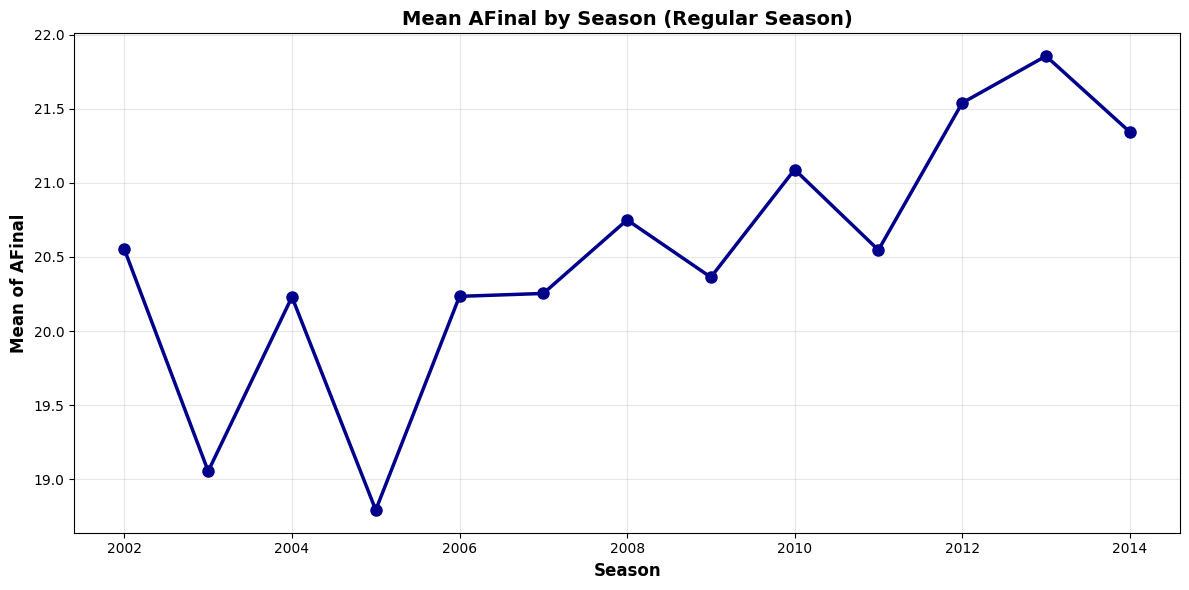

In [141]:
# Function Call 1: Average away team final score by season
plot_nfl_trend(df=nfl_df,
               variable='AFinal',
               stat='mean',
               group_by='season',
               title_suffix='(Regular Season)')

This shows the trend in away team scoring over the years. There may have been some rule change here?

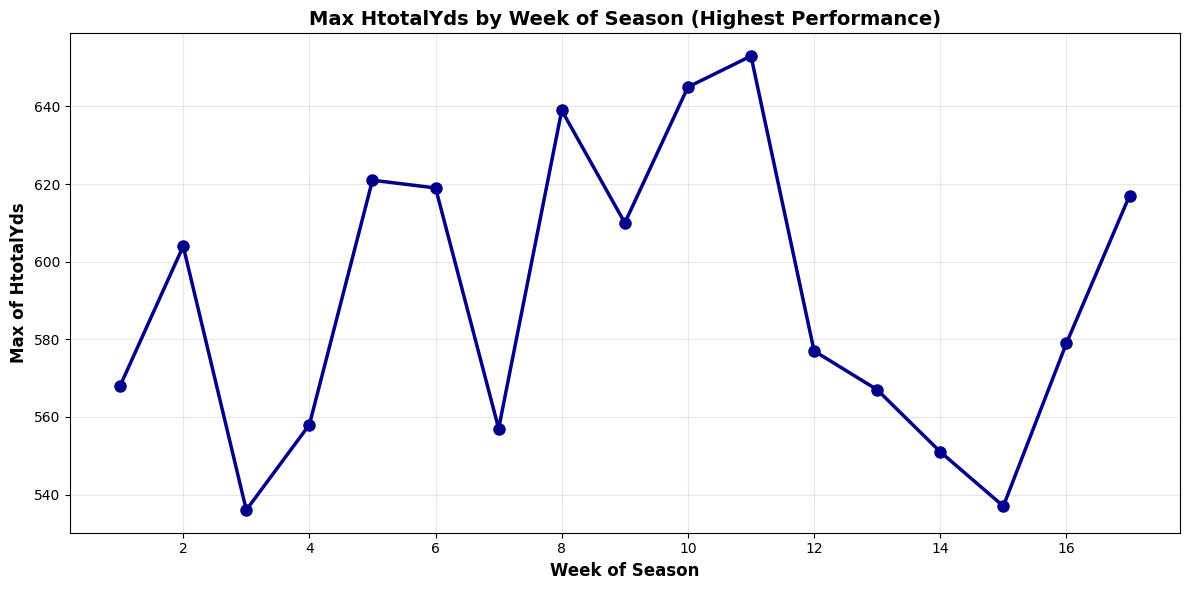

In [138]:
# Function Call 2: Maximum home team total yards by week
# The column for total yards is 'HtotalYds' not 'HTotalYards'
plot_nfl_trend(df=nfl_df,
               variable='HtotalYds',
               stat='max',
               group_by='week',
               title_suffix='(Highest Performance)')

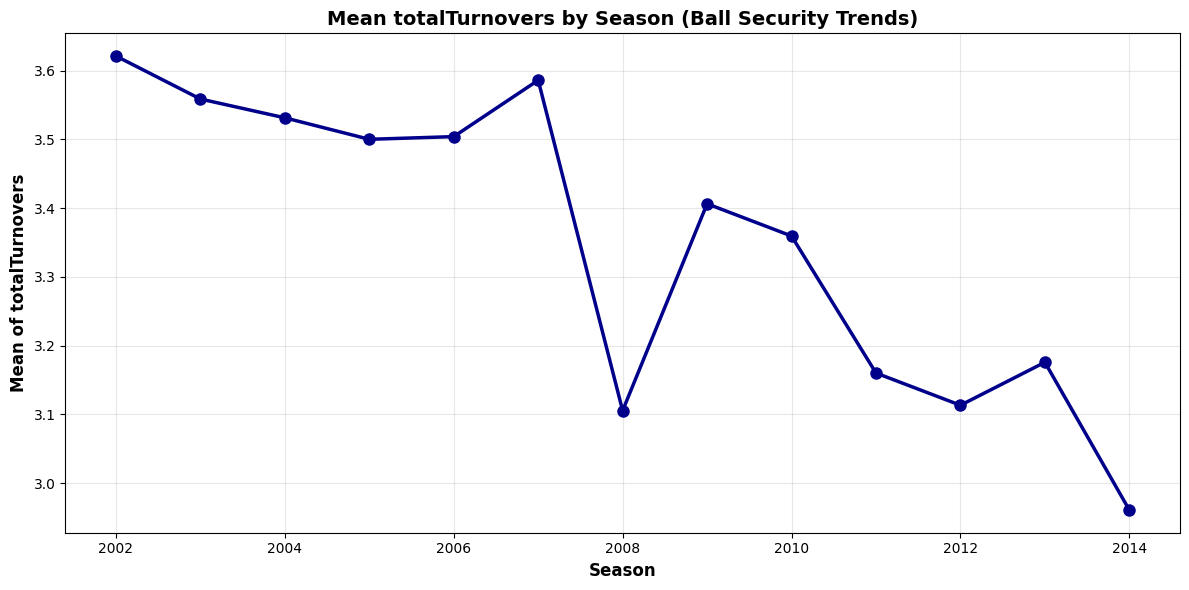

In [139]:
# Function Call 3: Median turnovers by season
nfl_df['totalTurnovers'] = nfl_df['Aturnovers'] + nfl_df['Hturnovers']
plot_nfl_trend(df=nfl_df,
               variable='totalTurnovers',
               stat='mean',
               group_by='season',
               title_suffix='(Ball Security Trends)')